In [1]:
from numpy.fft import fft, ifft, hfft
from scipy.signal import lfilter
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from IPython.display import Audio
from scipy import signal
from helpers import *

figsize=(10,5)

In [2]:
fs = 44100

# Filters

In [3]:
def notch(x, wc, G=3, Q=0.99, pole=False):
    
    b = np.array((G,  -2 * G * np.cos(wc), G))
    a = np.array((1, - 2 * Q * np.cos(wc), Q**2 ))
    
    if pole==True:
        freq_response(b,a)
        return zplane(b,a)
    
    x = lfilter(b, a, x)
    return x / np.max(np.abs(x))

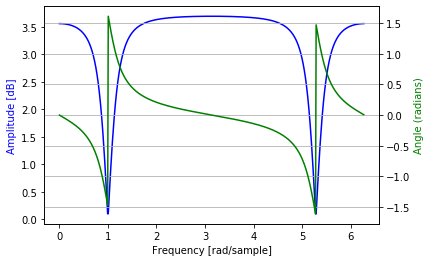

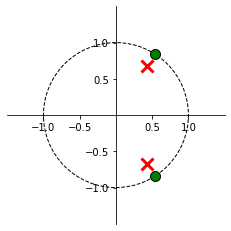

(array([0.54030231+0.84147098j, 0.54030231-0.84147098j]),
 array([0.43224184+0.67317679j, 0.43224184-0.67317679j]),
 3.0)

In [4]:
notch(np.ones(1), 1, G=3, Q=0.8, pole=True)

In [5]:
def shelf(x, wc, G=2, band="low", pole=False):
    if band=="low":
        b = np.array(((G * np.tan(wc/2) + np.sqrt(G)), (G* np.tan(wc/2)-np.sqrt(G))))
        a = np.array((np.tan(wc/2) + np.sqrt(G),(np.tan(wc/2)-np.sqrt(G))))
    
    if band=="high":
        b = np.array(((np.sqrt(G) * np.tan(wc/2) + G), (np.sqrt(G)* np.tan(wc/2)-G)))
        a = np.array((np.sqrt(G) * np.tan(wc/2) + 1,(np.sqrt(G)*np.tan(wc/2)-1)))
        
    if pole==True:
        print(b, a)
        freq_response(b,a)
        return zplane(b,a)
        
    x = lfilter(b, a, x)
    return x / np.max(np.abs(x))

[ 1.716484   -1.11194313] [ 1.56534878 -1.26307834]


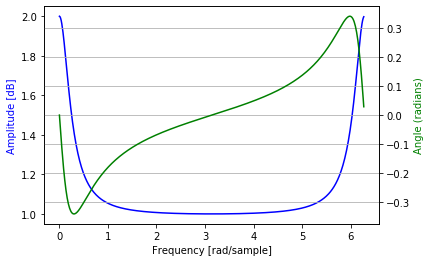

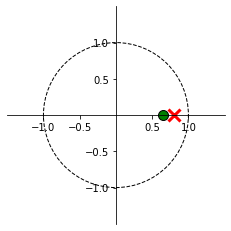

(array([0.64780279]), array([0.80689899]), 1.0965505067928978)

In [6]:
shelf(np.ones(1), 0.3, 2, "low", pole=True)

In [7]:
def cut(x, wc, G=2, band="low", pole=False):

    if wc < np.pi/2 or wc > 3*np.pi/2:
        alpha = 1 - wc
    else:
        alpha = -(1 - np.pi + wc)
        
    if band=="low":     
        b = np.array([G,G])
        a = np.array([1, -alpha])
    if band=="high":
        b = np.array([G,-G])
        a = np.array([1, -alpha])

    if pole==True:
        print(b, a)
        freq_response(b,a)
        return zplane(b,a)
        
    x = lfilter(b, a, x)
    return x / np.max(np.abs(x))

[0.25 0.25] [ 1.  -0.5]


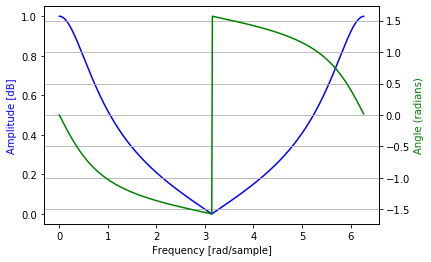

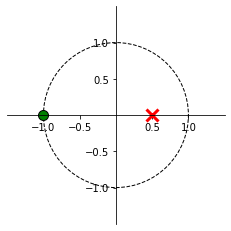

(array([-1.]), array([0.5]), 1.0)

In [8]:
cut(np.ones(1), .5, .25, "low", pole=True)

# Guitar sample

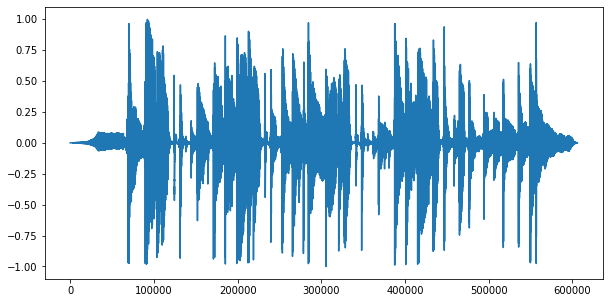

In [9]:
fs, data = wavfile.read('samples/guitar.wav')
guitar_sample = np.array(data, dtype=np.float32)
guitar_sample /= np.max(np.abs(guitar_sample) )
plt.figure(figsize=figsize)
plt.plot(guitar_sample)
Audio("samples/guitar.wav", autoplay=False)

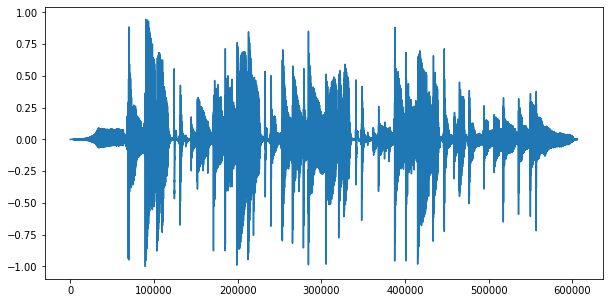

In [13]:
guitar_EQ = shelf(guitar_sample, 0.3, 10, "low")

plt.figure(figsize=figsize)
plt.plot(guitar_EQ)
wavfile.write('samples/guitar_EQ.wav', fs, (0x7FFF * guitar_EQ).astype(np.int16))
Audio("samples/guitar_EQ.wav", autoplay=False)

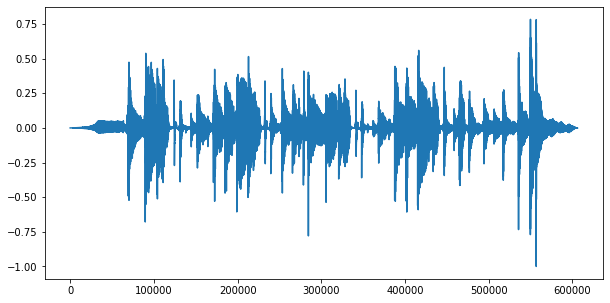

In [14]:
guitar_EQ = notch(guitar_sample, .1, Q=.9)

plt.figure(figsize=figsize)
plt.plot(guitar_EQ)
wavfile.write('samples/guitar_EQ.wav', fs, (0x7FFF * guitar_EQ).astype(np.int16))
Audio("samples/guitar_EQ.wav", autoplay=False)